In [2]:
import json
from collections import Counter

import numpy as np

from textblob import TextBlob

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
file_path = "/Users/elenimandana/Projects/Thesis/MSc-thesis/data/contracts/DeFiHacks/defihack.json"  

with open(file_path, "r") as file:
    data = json.load(file) 

In [4]:
count = sum(1 for entry in data if "vulnerable_code_snippet" in entry)

print("Number of vulnerable_code_snippet entries:", count)

Number of vulnerable_code_snippet entries: 331


Count: 331
Total length: 413363
Average length: 1248.83
Minimum length: 62
Maximum length: 16626


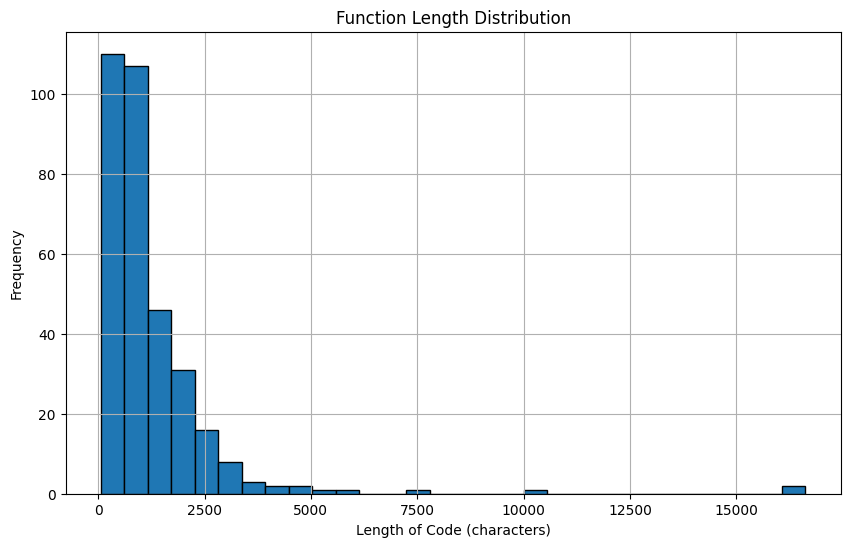

In [5]:
snippet_lengths = [len(entry["vulnerable_code_snippet"]) for entry in data if "vulnerable_code_snippet" in entry]

if snippet_lengths:
    # Basic statistics
    count = len(snippet_lengths)  # Total snippets
    total_length = sum(snippet_lengths)  # Total length
    average_length = total_length / count  # Mean
    minimum_length = min(snippet_lengths)  # Minimum length
    maximum_length = max(snippet_lengths)  # Maximum length

    print(f"Count: {count}")
    print(f"Total length: {total_length}")
    print(f"Average length: {average_length:.2f}")
    print(f"Minimum length: {minimum_length}")
    print(f"Maximum length: {maximum_length}")

    plt.figure(figsize=(10, 6))
    plt.hist(snippet_lengths, bins=30, edgecolor='black')
    plt.title('Function Length Distribution')
    plt.xlabel('Length of Code (characters)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print("No 'vulnerable_code_snippet' entries found.")

In [6]:
snippets = [entry["vulnerable_code_snippet"] for entry in data if "vulnerable_code_snippet" in entry]

# Count occurrences of each snippet
snippet_counts = Counter(snippets)

# Find duplicates (count > 1)
duplicates = {snippet: count for snippet, count in snippet_counts.items() if count > 1}

# Print results
if duplicates:
    print("Duplicate 'vulnerable_code_snippet' entries found:")
    for snippet, count in duplicates.items():
        print(f"Snippet (length {len(snippet)}): Occurs {count} times")
else:
    print("No duplicate 'vulnerable_code_snippet' entries found.")

Duplicate 'vulnerable_code_snippet' entries found:
Snippet (length 342): Occurs 2 times


In [7]:
word_counts = [len(snippet.split()) for snippet in snippets]
average_word_count = sum(word_counts) / len(word_counts)
print(f"Average Word Count: {average_word_count:.2f}")

Average Word Count: 115.99


In [ ]:
all_words = " ".join(snippets).split()
word_freq = Counter(all_words)

print("Top 10 most common words:")
for word, count in word_freq.most_common(10):
    print(f"{word}: {count}")

Top 10 most common words:
=: 1893
}: 1254
{: 1199
uint256: 852
//: 713
function: 684
if: 544
address: 483
*: 479
the: 389


In [ ]:
line_counts = [snippet.count('\n') + 1 for snippet in snippets] 
average_line_count = sum(line_counts) / len(line_counts)
print(f"Average Line Count: {average_line_count:.2f}")

Average Line Count: 29.85


In [10]:
max_lines = max(line_counts)
print(f"Max Lines in a Snippet: {max_lines}")

Max Lines in a Snippet: 427


In [11]:
keywords = ["require", "address", "safeTransfer", "owner"]
keyword_counts = {key: sum(snippet.count(key) for snippet in snippets) for key in keywords}

print("Keyword Counts:")
for key, count in keyword_counts.items():
    print(f"{key}: {count}")

Keyword Counts:
require: 605
address: 1693
safeTransfer: 89
owner: 119


In [12]:
bins = [0, 100, 200, 300, 400, 500, 1000] 
lengths = [len(snippet) for snippet in snippets]
hist, bin_edges = np.histogram(lengths, bins=bins)

print("Snippet Length Distribution:")
for i in range(len(hist)):
    print(f"{bin_edges[i]}-{bin_edges[i+1]} characters: {hist[i]}")

Snippet Length Distribution:
0-100 characters: 4
100-200 characters: 13
200-300 characters: 17
300-400 characters: 31
400-500 characters: 24
500-1000 characters: 99


In [13]:
symbols = ["(", ")", "{", "}", ";"]
symbol_counts = {sym: sum(snippet.count(sym) for snippet in snippets) for sym in symbols}

print("Symbol Counts:")
for sym, count in symbol_counts.items():
    print(f"{sym}: {count}")

Symbol Counts:
(: 7009
): 6995
{: 1364
}: 1338
;: 4319


In [14]:
def max_nesting_depth(snippet):
    max_depth = 0
    depth = 0
    for char in snippet:
        if char == '{':
            depth += 1
            max_depth = max(max_depth, depth)
        elif char == '}':
            depth -= 1
    return max_depth

nesting_depths = [max_nesting_depth(snippet) for snippet in snippets]
average_depth = sum(nesting_depths) / len(nesting_depths)
print(f"Average Nesting Depth: {average_depth:.2f}")

Average Nesting Depth: 1.95


In [15]:
comments = [line for snippet in snippets for line in snippet.splitlines() if "//" in line]
sentiments = [TextBlob(comment).sentiment.polarity for comment in comments]
average_sentiment = sum(sentiments) / len(sentiments)
print(f"Average Sentiment Score: {average_sentiment:.2f}")

Average Sentiment Score: -0.02


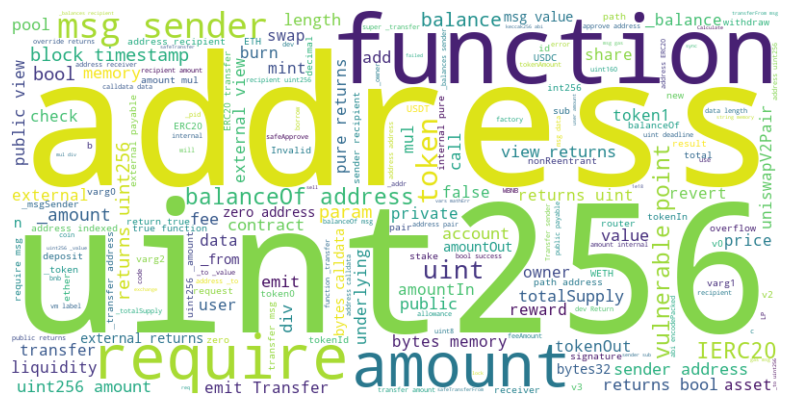

In [16]:
text = " ".join(snippets)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()